In [6]:
import os
import shutil
from tensorflow.python.client import device_lib
import keras
from keras import layers, models, optimizers
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout, Input
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications import EfficientNetB7, ResNet50
from keras.preprocessing import image
from keras.models import Model
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import load_img
from PIL import Image
import os
import shutil

import matplotlib.pyplot as plt

In [7]:
# Dataset personnes
!git clone https://gitlab.enseeiht.fr/aandre2/Dataset_Market-1501-v15.09.15

# Dataset pokemons
!git clone https://gitlab.enseeiht.fr/nurbani/dataset-pokemon


Cloning into 'Dataset_Market-1501-v15.09.15'...
remote: Counting objects: 77323, done.
remote: Compressing objects: 100% (70371/70371), done.
remote: Total 77323 (delta 6952), reused 77323 (delta 6952)
Receiving objects: 100% (77323/77323), 129.42 MiB | 15.43 MiB/s, done.
Resolving deltas: 100% (6952/6952), done.
Checking out files: 100% (143817/143817), done.
Cloning into 'dataset-pokemon'...
remote: Counting objects: 26364, done.
remote: Compressing objects: 100% (25090/25090), done.
remote: Total 26364 (delta 1274), reused 26364 (delta 1274)
Receiving objects: 100% (26364/26364), 26.87 MiB | 419.00 KiB/s, done.
Resolving deltas: 100% (1274/1274), done.


On commence par les chemins

In [8]:
path_pokemon = "/content/dataset-pokemon/"

In [9]:
#Chemin vers les pokemon qu'on va utiliser
pokemon_1G_red_blue = os.listdir(path_pokemon + '1G-red-blue')[:151]
pokemon_1G_red_green = os.listdir(path_pokemon + '1G-red-green')[:151]
pokemon_1G_yellow = os.listdir(path_pokemon + '1G-yellow')[:151]
pokemon_2G_crystal = os.listdir(path_pokemon + '2G-crystal')[:151]
pokemon_2G_gold = os.listdir(path_pokemon + '2G-gold')[:151]
pokemon_2G_silver = os.listdir(path_pokemon + '2G-silver')[:151]
pokemon_3G_emerald = os.listdir(path_pokemon + '3G-emerald')[:151]
pokemon_3G_firered_leafgreen = os.listdir(path_pokemon + '3G-firered-leafgreen')[:151]
pokemon_3G_ruby_sapphire = os.listdir(path_pokemon + '3G-ruby-sapphire')[:151]
pokemon_4G_diamond_pearl = os.listdir(path_pokemon + '4G-diamond-pearl')[:151]
pokemon_4G_heartgold_soulsilver = os.listdir(path_pokemon + '4G-heartgold-soulsilver')[:151]
pokemon_4G_platinum = os.listdir(path_pokemon + '4G-platinum')[:151]
pokemon_5G_black_white = os.listdir(path_pokemon + '5G-black-white')[:151]

Création du fichier de données d'entraînement

In [10]:
# path train
path_train_pokemon = path_pokemon + "train/"

# train folder
if not os.path.exists(path_train_pokemon):
  os.mkdir(path_train_pokemon)

# train images
for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "1G-red-blue/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-1G-red-blue.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "1G-red-green/" + str(filename) +'.png', path_train_pokemon + str(filename) + '-1G-red-green.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "1G-yellow/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-1G-yellow.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "2G-crystal/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-2G-crystal.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "2G-gold/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-2G-gold.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "2G-silver/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-2G-silver.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "3G-emerald/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-3G-emerald.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "3G-firered-leafgreen/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-3G-firered-leafgreen.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "3G-ruby-sapphire/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-3G-ruby-sapphire.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "4G-diamond-pearl/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-4G-diamond-perl.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "4G-heartgold-soulsilver/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-4G-heartgold-soulsilver.png')

# train labels
train_filenames = os.listdir(path_train_pokemon)
train_categories=[]
for filename in train_filenames:
    train_categories.append(filename.split('-')[0])

Création du fichier des données de validation

In [11]:
# path validation
path_validation_pokemon = path_pokemon + "validation/"

# validation folder
if not os.path.exists(path_validation_pokemon):
  os.mkdir(path_validation_pokemon)


# Creation
if not os.path.exists(path_validation_pokemon):
  os.mkdir(path_validation_pokemon)

# Validation images
for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "5G-black-white/" + str(filename) + '.png', path_validation_pokemon + str(filename) + '-5G-black-white.png')

# validation labels
validation_filenames = os.listdir(path_validation_pokemon)
validation_categories=[]
for filename in validation_filenames:
  validation_categories.append(filename.split('-')[0])

Création du fichier des données de test

In [12]:
# path test
path_test_pokemon = path_pokemon + "test/"

# testfolder
if not os.path.exists(path_test_pokemon):
  os.mkdir(path_test_pokemon)


# Test images
for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "4G-platinum/" + str(filename) + '.png', path_test_pokemon + str(filename) + '-4G-platinum.png')

# Test labels
test_filenames = os.listdir(path_test_pokemon)
test_categories=[]
for filename in test_filenames:
  test_categories.append(filename.split('-')[0])

Création des ensemble d'apprentissage, test et validation

In [13]:
#Images d'entrainement
train_df = pd.DataFrame({
    'filename': train_filenames,
    'category': train_categories
})


#Images de validation
validation_df = pd.DataFrame({
    'filename': validation_filenames,
    'category': validation_categories
})


#Images de test
test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': test_categories
})


train_df['category'] = train_df['category'].astype(str)
validation_df['category'] = validation_df['category'].astype(str)
test_df['category'] = validation_df['category'].astype(str)

total_train = train_df.shape[0]
total_validate = validation_df.shape[0]

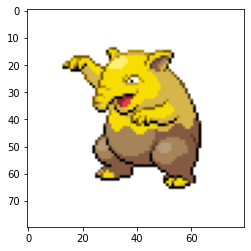

In [14]:
import random
from keras.preprocessing.image import load_img

sample = random.choice(test_filenames)
image = load_img(path_test_pokemon + sample)
plt.imshow(image)
plt.show()

Ensemble d'entraînement, test et validation

In [15]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16
image_size = 32


#Images d'entrainement
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    path_train_pokemon,
    x_col='filename',
    y_col='category',
    target_size=(image_size,image_size),
    batch_size=batch_size
)

#Images de validation
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df, 
    path_validation_pokemon, 
    x_col='filename',
    y_col='category',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

#Images de test
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    path_test_pokemon, 
    x_col='filename',
    y_col='category',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 1661 validated image filenames belonging to 151 classes.
Found 151 validated image filenames belonging to 151 classes.
Found 151 validated image filenames belonging to 151 classes.


Entraînement du réseau de neurone.

On utilise un VGG pré-entraîné sur imagenet



Import VGG

In [16]:
# #VGG pré entraîné sur imagenet
# model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
# model_vgg16_conv.summary()

# #Mon input c'est du 40 40 3
# input = Input(shape=(32, 32, 3),name = 'image_input')

# output_vgg16_conv = model_vgg16_conv(input)

# #On rajoute quelques layers
# x = Flatten(name='flatten')(output_vgg16_conv)
# x = Dense(4096, activation='relu', name='fc1')(x)
# x = Dense(4096, activation='relu', name='fc2')(x)
# x = Dense(151, activation='softmax', name='predictions')(x)

# #Mon modele à moi
# my_model = Model(inputs=input, outputs=x)

# my_model.summary()

C'est parti pour l'entraînnement !

In [17]:
# my_model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.Adam(lr=3e-4),
#               metrics=['acc'])

In [18]:
# history = my_model.fit(train_generator,
#                     steps_per_epoch=total_train//batch_size,
#                     validation_data=validation_generator,
#                     validation_steps=total_validate//batch_size,
#                     epochs=100,
#                     )

Fonction qui analyse les résultats

In [19]:
def plot_training_analysis():
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

On observe clairement un phénomène de sur-apprentissage.

In [20]:
# #VGG pré entraîné sur imagenet
# model_efficient_net = EfficientNetB7(include_top=False, weights="imagenet", classes=151,classifier_activation="softmax",)
# model_efficient_net.summary()

# #Mon input c'est du 40 40 3
# input = Input(shape=(32, 32, 3), name = 'image_input')

# output_efficient_net = model_efficient_net(input)

# #On rajoute quelques layers
# x = Flatten(name='flatten')(output_efficient_net)
# x = Dense(4096, activation='relu', name='fc1')(x)
# x = Dense(4096, activation='relu', name='fc2')(x)
# x = Dense(151, activation='softmax', name='predictions')(x)

# #Mon modele à moi
# my_model_2 = Model(inputs=input, outputs=x)

# my_model_2.summary()

In [21]:
# my_model_2.compile(loss='binary_crossentropy',
#               optimizer=optimizers.Adam(lr=3e-4),
#               metrics=['acc'])

In [22]:
# history = my_model_2.fit(train_generator,
#                     steps_per_epoch=total_train//batch_size,
#                     validation_data=validation_generator,
#                     validation_steps=total_validate//batch_size,
#                     epochs=100,
#                     )

In [23]:
# plot_training_analysis()

VGG et Efficient net ont plus de 100M de paramètres, ce qui est bien trop gros pour ma petite base d'apprentissage de 1661 images. Essayons Resnet50 qui a 25M paramètres

In [24]:
model_resnet = ResNet50(weights='imagenet', include_top=False, classes=151)
model_resnet.summary()

#Mon input c'est du 32 32 3
input = Input(shape=(32, 32, 3), name = 'image_input')

output_resnet = model_resnet(input)

#On rajoute quelques layers
x = Flatten(name='flatten')(output_resnet)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dense(151, activation='softmax', name='predictions')(x)

#Mon modele à moi
my_model_3 = Model(inputs=input, outputs=x)

my_model_3.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
__________________________

In [25]:
my_model_3.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

In [ ]:
history = my_model_3.fit(train_generator,
                    steps_per_epoch=total_train//batch_size,
                    validation_data=validation_generator,
                    validation_steps=total_validate//batch_size,
                    epochs=200,
                    )

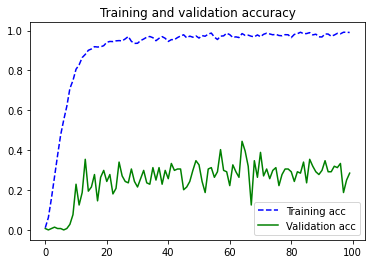

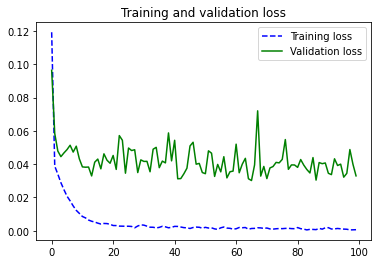

In [27]:
plot_training_analysis()

Toujours pour tester, je vois ce que donne un réseauu de neurone réalisé moi même, un petit CNN

Après réflexion, il serait pertinent de tester nos modèles sur une mesure "top 5" ou "top 10"

In [145]:
def top5(my_model, test_set, validation_set):

  """ Compute top5 accuracy of the model over test and validation set"""

  prediction_test = my_model.predict(test_set)
  prediction_validation = my_model.predict(validation_set)

  ind = np.argmax(prediction_validation[0, :])
  #print("model prediction validation", prediction_validation[0, :])
  #print("vérification de la somme", np.sum(prediction_validation[0, :]))
  #print("indice max", np.argmax(prediction_validation[0, :]))
  #print("valeur_max", prediction_validation[0, ind])
  top5_test = np.argsort(prediction_test, axis=1)[:, -5:]
  top5_validation = np.argsort(prediction_validation, axis=1)[:, -5:]

  #print(top5_test)
  #print(top5_validation)

  bonne_reponse_test = 0
  i = 0
  for labels in test_generator.labels:
    #print("i =", i)
    #print(labels)
    #print(top5_test[i])
    if (labels in top5_test[i, :]):
      bonne_reponse_test += 1
    i=i+1
    #print(i)

  bonne_reponse_validation = 0
  i = 0
  for labels in validation_generator.labels:
    #print("i =", i)
    #print("true label =", labels)
    #print("top 5 label =", top5_validation[i])
    if (labels in top5_validation[i, :]):
      bonne_reponse_validation += 1
    i=i+1

  bonne_reponse_test /= 151
  bonne_reponse_validation /= 151

  return bonne_reponse_test*100, bonne_reponse_validation*100

In [144]:
def top10(my_model, test_set, validation_set):

  """ Compute top5 accuracy of the model over test and validation set"""

  prediction_test = my_model.predict(test_set)
  prediction_validation = my_model.predict(validation_set)

  ind = np.argmax(prediction_validation[0, :])
  #print("model prediction validation", prediction_validation[0, :])
  #print("vérification de la somme", np.sum(prediction_validation[0, :]))
  #print("indice max", np.argmax(prediction_validation[0, :]))
  #print("valeur_max", prediction_validation[0, ind])
  top10_test = np.argsort(prediction_test, axis=1)[:, -10:]
  top10_validation = np.argsort(prediction_validation, axis=1)[:, -10:]

  #print(top5_test)
  #print(top5_validation)

  bonne_reponse_test = 0
  i = 0
  for labels in test_generator.labels:
    #print("i =", i)
    #print(labels)
    #print(top5_test[i])
    if (labels in top10_test[i, :]):
      bonne_reponse_test += 1
    i=i+1
    #print(i)

  bonne_reponse_validation = 0
  i = 0
  for labels in validation_generator.labels:
    #print("i =", i)
    #print("true label =", labels)
    #print("top 5 label =", top5_validation[i])
    if (labels in top10_validation[i, :]):
      bonne_reponse_validation += 1
    i=i+1

  bonne_reponse_test /= 151
  bonne_reponse_validation /= 151

  return bonne_reponse_test*100, bonne_reponse_validation*100

In [ ]:
top5(my_model_3, test_generator, validation_generator)
top10(my_model_3, test_generator, validation_generator)


augmentaton with imgaug

In [113]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

In [123]:
train_filenames = os.listdir(path_train_pokemon)

for i in range(50):
  for filename in train_filenames:
    image = np.array(load_img(path_train_pokemon + filename))
    image_aug = seq(images = image)

    #Rescale to 0-255 and convert to uint8
    rescaled = (255.0 / image_aug.max() * (image_aug - image_aug.min())).astype(np.uint8)
    image_aug = Image.fromarray(rescaled)

    image_aug.save(path_train_pokemon + filename.split(".")[0] + "-aug" + str(i) + ".png")

In [125]:
# train labels new
train_filenames = os.listdir(path_train_pokemon)
train_categories=[]
for filename in train_filenames:
    train_categories.append(filename.split('-')[0])

In [126]:
#Images d'entrainement
train_df = pd.DataFrame({
    'filename': train_filenames,
    'category': train_categories
})

In [127]:
#Images d'entrainement
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    path_train_pokemon,
    x_col='filename',
    y_col='category',
    target_size=(image_size,image_size),
    batch_size=batch_size
)

Found 84711 validated image filenames belonging to 151 classes.


On vérifie que les données ont les bons labels

label : 76


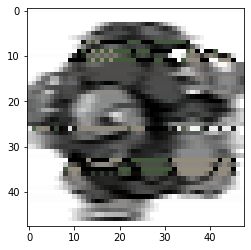

In [137]:
train_filenames = os.listdir(path_train_pokemon)
sample = random.randint(0, 84711)
image = load_img(path_train_pokemon + train_filenames[sample])
plt.imshow(image)
print("label :", train_categories[sample])

In [128]:
model_resnet = ResNet50(weights='imagenet', include_top=False, classes=151)
model_resnet.summary()

#Mon input c'est du 32 32 3
input = Input(shape=(32, 32, 3), name = 'image_input')

output_resnet = model_resnet(input)

#On rajoute quelques layers
x = Flatten(name='flatten')(output_resnet)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dense(151, activation='softmax', name='predictions')(x)

#Mon modele à moi
my_model_4 = Model(inputs=input, outputs=x)

my_model_4.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [129]:
my_model_4.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

In [130]:
history = my_model_4.fit(train_generator,
                    steps_per_epoch=total_train//batch_size,
                    validation_data=validation_generator,
                    validation_steps=total_validate//batch_size,
                    epochs=200,
                    )

Epoch 1/200
103/103 [==============================] - 12s 58ms/step - loss: 0.3099 - acc: 0.0066 - val_loss: 0.0568 - val_acc: 0.0069
Epoch 2/200
103/103 [==============================] - 4s 43ms/step - loss: 0.0407 - acc: 0.0345 - val_loss: 0.0537 - val_acc: 0.0069
Epoch 3/200
103/103 [==============================] - 4s 39ms/step - loss: 0.0379 - acc: 0.0837 - val_loss: 0.0621 - val_acc: 0.0000e+00
Epoch 4/200
103/103 [==============================] - 4s 36ms/step - loss: 0.0352 - acc: 0.1396 - val_loss: 0.0459 - val_acc: 0.0069
Epoch 5/200
103/103 [==============================] - 4s 36ms/step - loss: 0.0326 - acc: 0.1944 - val_loss: 0.0460 - val_acc: 0.0139
Epoch 6/200
103/103 [==============================] - 4s 35ms/step - loss: 0.0288 - acc: 0.2671 - val_loss: 0.0431 - val_acc: 0.0208
Epoch 7/200
103/103 [==============================] - 4s 36ms/step - loss: 0.0260 - acc: 0.3212 - val_loss: 0.0465 - val_acc: 0.0208
Epoch 8/200
103/103 [==============================] - 4s

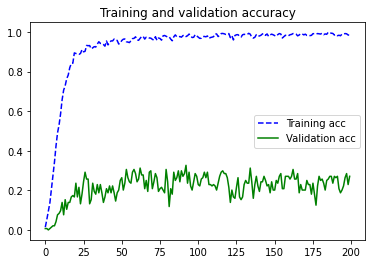

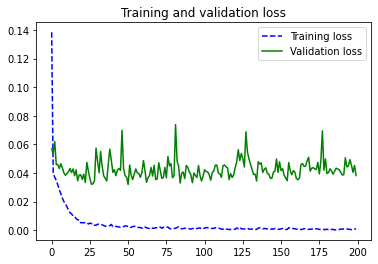

In [138]:
plot_training_analysis()

In [152]:
top5(my_model_4, test_generator, validation_generator)


(3.3112582781456954, 3.3112582781456954)

In [153]:
top10(my_model_4, test_generator, validation_generator)

(7.9470198675496695, 5.960264900662252)

autoencoder classifier